In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import pandas as pd
import numpy as np

In [2]:
plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'Arial'
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

In [3]:
cra_color = 'forestgreen'
nsc_color = 'dodgerblue'
eco_color = 'rebeccapurple'

# Plot the cost effectiveness plane

In [4]:
cra = [4377.84, 29.0727]
nsc = [3709.66, 29.0765]
eco = [3773.36, 29.0778]

line_x = [nsc[0], eco[0]]
line_y = [nsc[1], eco[1]]

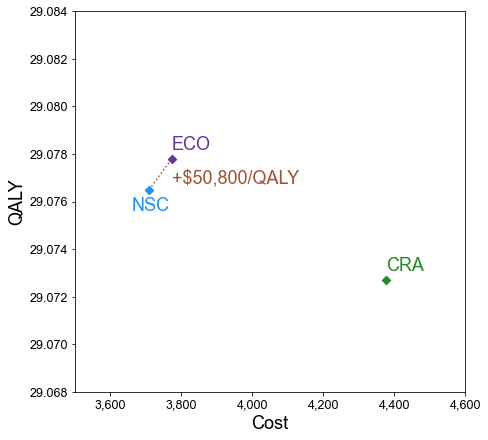

In [5]:
fig, ax = plt.subplots(figsize=(7,7))
ax.get_xaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.plot(line_x, line_y, color='sienna', zorder=1, linestyle='dotted')
plt.scatter(cra[0], cra[1], label="CRA", color=cra_color, marker='D')
plt.text(cra[0], cra[1]+0.0004, "CRA", color=cra_color)
plt.scatter(nsc[0], nsc[1], label="NSC", color=nsc_color, marker='D', zorder=2)
plt.text(nsc[0]-50, nsc[1]-0.0009, "NSC", color=nsc_color)
plt.scatter(eco[0], eco[1], label="ECO", color=eco_color, marker='D', zorder=3)
plt.text(eco[0], eco[1]+0.0004, "ECO", color=eco_color)
plt.text(eco[0], eco[1]-0.001, "+$50,800/QALY", color='sienna')
plt.xlim(3500, 4600)
plt.ylim(29.068, 29.084)
plt.xlabel('Cost')
plt.ylabel('QALY')
plt.show()

# Plot the PSA

In [6]:
psa = pd.read_csv("PSA/psa100000_scatter_new.csv")

In [7]:
psa.columns

Index(['Iteration', 'Parameters', 'pSepsis1', 'pChorio', 'pSepsis1c',
       'pSepsis2Red', 'pSepsis2YellowBCPos', 'pIllAppearingBCPosYellow',
       'pIllAppearingGreen', 'pIllAppearingNoChorio', 'pIllAppearingStrat3',
       'pSepsis3', 'pSepsis2Green', 'pYellow', 'pRed', 'scale2', 'scale3',
       'pSepsis3Scaled', 'pSepsis2GreenScaled', 'pSepsis2YellowBCPosScaled',
       'pSepsis2RedScaled', 'IncidenceEOS', 'scale1', 'pSepsis1Scaled',
       'pSepsis1cScaled', 'pReadmission', 'pDeathAfterReadmission',
       'pLTSAfterReadmission', 'pOtotoxicity', 'pLTSCSFPos', 'pCSFPosDeath',
       'pCSFNegDeath', 'pCSFPos', 'cLevel1NurseryAdmissionPerDay',
       'cLevel1NursingCarePerDay', 'cLevel2NICUAdmissionPerDay',
       'cLevel2NursingCarePerDay', 'cGentamicin1', 'cAmpicillin1',
       'cInitialNICUTests', 'cBloodCulture1', 'cCSFNeg', 'cReadmission',
       'qNLTS', 'qDeath', 'qNCD', 'qOtotoxicity', 'c2DayNursery', 'c7DayNICU',
       'cYellow', 'c2DayNICU', 'cCSFPos', 'cDeath', 'cNCD', 

In [8]:
psa.head()

,Iteration,Parameters,pSepsis1,pChorio,pSepsis1c,pSepsis2Red,pSepsis2YellowBCPos,pIllAppearingBCPosYellow,pIllAppearingGreen,pIllAppearingNoChorio,...,NSC.1,Enhanced Clinical Observation.1,LY,Categorical Risk Assessment.2,NSC.2,Enhanced Clinical Observation.2,ICER ($/QALY),Categorical Risk Assessment.3,NSC.3,Enhanced Clinical Observation.3
0,1,NaN,0.018882,0.063038,0.006792,0.008599,0.009325,0.135529,0.012534,0.057065,...,29.076543,29.077028,NaN,0.999910,0.999910,0.999910,NaN,Strongly Dominated (Baseline),Cost Saving,319792.99035756785
1,2,NaN,0.020445,0.060953,0.012281,0.008820,0.009421,0.125992,0.016982,0.049590,...,29.077468,29.078211,NaN,0.999999,0.999999,0.999999,NaN,Strongly Dominated (Baseline),Cost Saving,195263.04487279916
2,3,NaN,0.042023,0.060714,0.008157,0.007507,0.009176,0.114337,0.010417,0.050547,...,29.076487,29.077483,NaN,0.999970,0.999970,0.999970,NaN,Strongly Dominated (Baseline),Cost Saving,87455.34377672634
3,4,NaN,0.011736,0.071972,0.005550,0.009164,0.006279,0.180769,0.019840,0.052966,...,29.078458,29.079961,NaN,0.999998,0.999998,0.999998,NaN,Strongly Dominated (Baseline),Strongly Dominated,Cost Saving
4,5,NaN,0.026701,0.062782,0.002822,0.009408,0.009250,0.183702,0.007998,0.056734,...,29.073243,29.075536,NaN,0.999912,0.999912,0.999912,NaN,Strongly Dominated (Baseline),Strongly Dominated,Cost Saving


In [9]:
# Compare CRA and ECO to NSC

psa['CRA_NSC_Icr_QALY'] = psa["Categorical Risk Assessment.1"] - psa["NSC.1"]
psa['CRA_NSC_Icr_Cost'] = psa["Categorical Risk Assessment"] - psa["NSC"]
psa['ECO_NSC_Icr_QALY'] = psa["Enhanced Clinical Observation.1"] - psa["NSC.1"]
psa['ECO_NSC_Icr_Cost'] = psa["Enhanced Clinical Observation"] - psa["NSC"]

psa['CRA_Cost_Saving_WRT_NSC'] = (psa['CRA_NSC_Icr_QALY'] > 0) & (psa['CRA_NSC_Icr_Cost'] < 0)
psa['CRA_CE_WRT_NSC'] = (psa['CRA_NSC_Icr_QALY'] > 0) & (psa['CRA_NSC_Icr_Cost']/psa['CRA_NSC_Icr_QALY'] <= 100000)
psa['ECO_Cost_Saving_WRT_NSC'] = (psa['ECO_NSC_Icr_QALY'] > 0) & (psa['ECO_NSC_Icr_Cost'] < 0)
psa['ECO_CE_WRT_NSC'] = (psa['ECO_NSC_Icr_QALY'] > 0) & (psa['ECO_NSC_Icr_Cost']/psa['ECO_NSC_Icr_QALY'] <= 100000)

print(psa['CRA_Cost_Saving_WRT_NSC'].value_counts())
print(psa['CRA_CE_WRT_NSC'].value_counts())
print(psa['ECO_Cost_Saving_WRT_NSC'].value_counts())
print(psa['ECO_CE_WRT_NSC'].value_counts())

False    99904
True        96
Name: CRA_Cost_Saving_WRT_NSC, dtype: int64
False    99904
True        96
Name: CRA_CE_WRT_NSC, dtype: int64
False    64571
True     35429
Name: ECO_Cost_Saving_WRT_NSC, dtype: int64
True     54983
False    45017
Name: ECO_CE_WRT_NSC, dtype: int64


In [10]:
# Compare CRA and ECO to NSC

psa['NSC_CRA_Icr_QALY'] = psa["NSC.1"] - psa["Categorical Risk Assessment.1"]
psa['NSC_CRA_Icr_Cost'] = psa["NSC"] - psa["Categorical Risk Assessment"]
psa['ECO_CRA_Icr_QALY'] = psa["Enhanced Clinical Observation.1"] - psa["Categorical Risk Assessment.1"]
psa['ECO_CRA_Icr_Cost'] = psa["Enhanced Clinical Observation"] - psa["Categorical Risk Assessment"]

psa['NSC_Cost_Saving_WRT_CRA'] = (psa['NSC_CRA_Icr_QALY'] > 0) & (psa['NSC_CRA_Icr_Cost'] < 0)
psa['NSC_CE_WRT_CRA'] = (psa['NSC_CRA_Icr_QALY'] > 0) & (psa['NSC_CRA_Icr_Cost']/psa['NSC_CRA_Icr_QALY'] <= 100000)
psa['ECO_Cost_Saving_WRT_CRA'] = (psa['ECO_CRA_Icr_QALY'] > 0) & (psa['ECO_CRA_Icr_Cost'] < 0)
psa['ECO_CE_WRT_CRA'] = (psa['ECO_CRA_Icr_QALY'] > 0) & (psa['ECO_CRA_Icr_Cost']/psa['ECO_CRA_Icr_QALY'] <= 100000)

print(psa['NSC_Cost_Saving_WRT_CRA'].value_counts())
print(psa['NSC_CE_WRT_CRA'].value_counts())
print(psa['ECO_Cost_Saving_WRT_CRA'].value_counts())
print(psa['ECO_CE_WRT_CRA'].value_counts())


True     99869
False      131
Name: NSC_Cost_Saving_WRT_CRA, dtype: int64
True     99883
False      117
Name: NSC_CE_WRT_CRA, dtype: int64
True     97110
False     2890
Name: ECO_Cost_Saving_WRT_CRA, dtype: int64
True     99931
False       69
Name: ECO_CE_WRT_CRA, dtype: int64


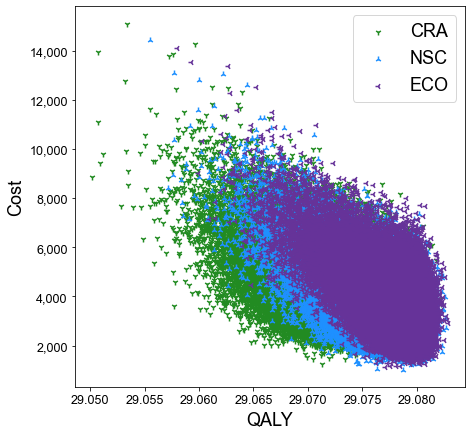

In [11]:
fig, ax = plt.subplots(figsize=(7,7))
ax.get_yaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.scatter(psa["Categorical Risk Assessment.1"], psa["Categorical Risk Assessment"],
            label="CRA", color=cra_color, marker='1', zorder=1)
plt.scatter(psa["NSC.1"], psa["NSC"],
            label="NSC", color=nsc_color, marker='2', zorder=2)
plt.scatter(psa["Enhanced Clinical Observation.1"], psa["Enhanced Clinical Observation"],
            label="ECO", color=eco_color, marker='3', zorder=3)
plt.xlabel('QALY')
plt.ylabel('Cost')
plt.legend()
plt.show()

In [12]:
x_vals = np.arange(-0.010, 0.020, 0.01)

In [13]:
wtp100000 = 100000*x_vals
wtp50000 = 50000*x_vals

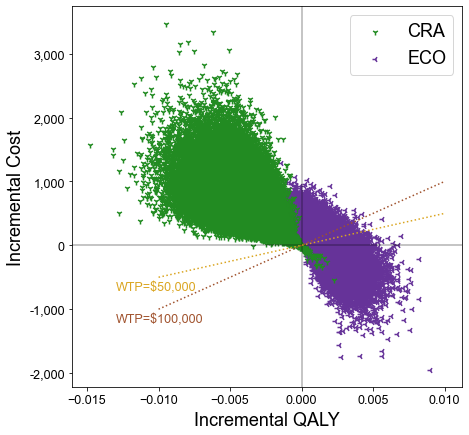

In [14]:
fig, ax = plt.subplots(figsize=(7,7))
ax.get_yaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.scatter(psa["Categorical Risk Assessment.1"] - psa["NSC.1"], psa["Categorical Risk Assessment"] - psa["NSC"],
            label="CRA", color=cra_color, marker='1', zorder=4)
plt.scatter(psa["Enhanced Clinical Observation.1"] - psa["NSC.1"], psa["Enhanced Clinical Observation"] - psa["NSC"],
            label="ECO", color=eco_color, marker='3', zorder=3)
plt.axvline(x=0, color='black', alpha=0.3, zorder=5)
plt.axhline(y=0, color='black', alpha=0.3, zorder=5)
plt.plot(x_vals, wtp100000, zorder=6, label='_$100,000 WTP Threshold', color='sienna', linestyle='dotted')
plt.text(x_vals[0]-0.003, wtp100000[0]-200, "WTP=$100,000", color='sienna', fontsize='x-small')
plt.plot(x_vals, wtp50000, zorder=6, label='_$50,000 WTP Threshold', color='goldenrod', linestyle='dotted')
plt.text(x_vals[0]-0.003, wtp50000[0]-200, "WTP=$50,000", color='goldenrod', fontsize='x-small')
plt.xlabel('Incremental QALY')
plt.ylabel('Incremental Cost')
plt.legend()
plt.show()

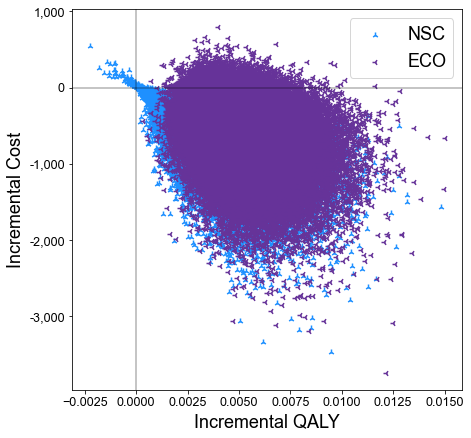

In [15]:
fig, ax = plt.subplots(figsize=(7,7))
ax.get_yaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))
#plt.scatter(psa["Categorical Risk Assessment.1"] - psa["NSC.1"], psa["Categorical Risk Assessment"] - psa["NSC"],
#            label="CRA", color=cra_color, marker='.', zorder=4)
plt.scatter(psa["NSC.1"] - psa["Categorical Risk Assessment.1"], psa["NSC"] - psa["Categorical Risk Assessment"],
            label="NSC", color=nsc_color, marker='2', zorder=3)
plt.scatter(psa["Enhanced Clinical Observation.1"] - psa["Categorical Risk Assessment.1"], psa["Enhanced Clinical Observation"] - psa["Categorical Risk Assessment"],
            label="ECO", color=eco_color, marker='3', zorder=4)

plt.axvline(x=0, color='black', alpha=0.3, zorder=5)
plt.axhline(y=0, color='black', alpha=0.3, zorder=5)
plt.xlabel('Incremental QALY')
plt.ylabel('Incremental Cost')
plt.legend()
plt.show()

In [16]:
ce_accept_curve = pd.read_csv("PSA/psa100000cecurve_new.csv")

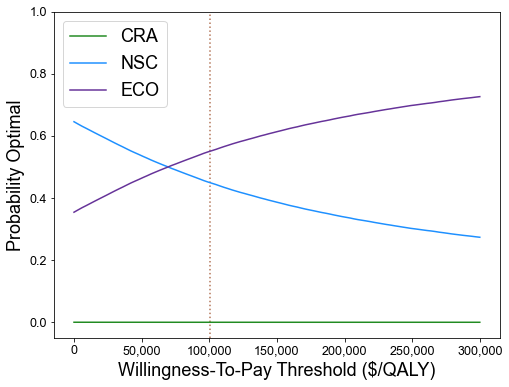

In [17]:
fig, ax = plt.subplots(figsize=(8,6))
ax.get_xaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.plot(ce_accept_curve["WTP"], ce_accept_curve["Categorical Risk Assessment"],
            label="CRA", color=cra_color, zorder=1)
plt.plot(ce_accept_curve["WTP"], ce_accept_curve["NSC"],
            label="NSC", color=nsc_color, zorder=2)
plt.plot(ce_accept_curve["WTP"], ce_accept_curve["Enhanced Clinical Observation"],
            label="ECO", color=eco_color, zorder=3)
plt.axvline(x=100175, color='sienna', alpha=0.8, zorder=0, linestyle='dotted')
plt.xlabel('Willingness-To-Pay Threshold ($/QALY)')
plt.ylabel('Probability Optimal')
plt.ylim(-0.05,1)
plt.legend()
plt.show()